In [79]:
import faker as fk
import random as rd
import csv
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Planteamiento con biblioteca faker

Vamos a inventarnos mediante la biblioteca faker mil datos para introducir en nuestro dataset.Este contendrá las siguientes columnas

•	L:longitud

•	T:tiempo de caida

•	G:gravedad

Esta será la formula 2L/(T^2) que emplearemos para calcular cada valor de la gravedad.Además añadiremos tambien ,tres columnas que nos indicaran los tres planetas más probabables en los que nos podemos encontrar en función de la gravedad de cada dato.Y por último una columna con el error que hemos cometido en cada medición de la gravedad

𝘦𝘹𝘱𝘦𝘳𝘪𝘮𝘦𝘯𝘵𝘰𝘴 𝘳𝘦𝘢𝘭𝘪𝘻𝘢𝘥𝘰𝘴

In [60]:
planetas_gravedad = {
    "Tierra": 9.8,
    "Marte": 3.7,
    "Júpiter": 24.8,
    "Saturno": 9.0,
    "Urano": 8.7,
    "Neptuno": 11.0
}

con los experimentos que hemos llevado acabo obtenemos los siguientes resultados

In [64]:
#experimento a
l1=1.00
t1=0.46
g1=round(2*(l1)/(t1**2),2)
print("La gravedad en el primer caso es ",g1)

La gravedad en el primer caso es  9.45


In [68]:
#experimento b
l2=2.00
t2=0.66
g2=round(2*(l2)/(t2**2),2)
print("La gravedad en el segundo  caso es ",g2)

La gravedad en el segundo  caso es  9.18


Sin embargo sabemos que estos cálculos no son precisos porque instrumento de 10 mm para la cinta milimetrada y de 10 milésimas de segundo para el cronómetro.Para calcular los errores de las mediciones tendremos que calcular el error absoluto y relativo para cada medición.Luego mediante la siguiente fórmula calcular error que hemos cometido en el cálculo de la gravedad.
Δg = |dg/dL * ΔL| + |dg/dt * Δt|

Donde:
dg/dL = Derivada parcial de g respecto a L = 2 / t^2
dg/dt = Derivada parcial de g respecto a t = -4L / t^3

In [69]:
def calcular_error_gravedad(l, t, delta_l, delta_t):
    dg_dL = 2 / (t**2)
    dg_dt = (-4 * l) / (t**3)
    
    error_gravedad = abs(dg_dL * delta_l) + abs(dg_dt * delta_t)
    return error_gravedad

In [71]:
# Experimento A
l1 = 1.00
t1 = 0.46
delta_l = 0.01
delta_t = 0.010
error_gravedad_1 = calcular_error_gravedad(l1, t1, delta_l, delta_t)

# Experimento B
l2 = 2.00
t2 = 0.66
error_gravedad_2 = calcular_error_gravedad(l2, t2, delta_l, delta_t)

print("El error  en la gravedad para el experimento A es ",error_gravedad_1)
print("El error  en la gravedad para el experimento B es ",error_gravedad_2)


El error  en la gravedad para el experimento A es  0.5054656036820908
El error  en la gravedad para el experimento B es  0.32417842335197705


ahora con estos datos que tenemos vamos a inventarnos a traves de la biblioteca faker otros mil más que añadiremos posteriormente al csv

In [75]:
def planetas_mas_probables(gravedad, planetas_gravedad, n=3):
    diferencias = {planeta: abs(gravedad - gravedad_planeta) for planeta, gravedad_planeta in planetas_gravedad.items()}
    planetas_ordenados = sorted(diferencias.items(), key=lambda x: x[1])
    return [planeta for planeta, diferencia in planetas_ordenados[:n]]

experimentos = [
    {"L": 1.00, "T": 0.46, "G": 9.45, "Error": 0.505},
    {"L": 2.00, "T": 0.66, "G": 9.18, "Error": 0.324}
]


for experimento in experimentos:
    planetas_probables = planetas_mas_probables(experimento["G"], planetas_gravedad)
    for i, planeta in enumerate(planetas_probables, 1):
        experimento[f"{i}º Planeta + Probable"] = planeta


df = pd.DataFrame(experimentos)

df

,L,T,G,Error,1º Planeta + Probable,2º Planeta + Probable,3º Planeta + Probable
0,1.0,0.46,9.45,0.505,Tierra,Saturno,Urano
1,2.0,0.66,9.18,0.324,Saturno,Urano,Tierra


## Dataset

In [100]:

fake = fk.Faker()

def calcular_error_gravedad(l, t, delta_l, delta_t):
    dg_dL = 2 / (t**2)
    dg_dt = (-4 * l) / (t**3)
    
    error_gravedad = abs(dg_dL * delta_l) + abs(dg_dt * delta_t)
    return error_gravedad

def generar_datos(planetas, L_final, t_final):
    L = round(rd.uniform(L_final - 0.1, L_final + 0.1), 2)
    t = round(rd.uniform(t_final - 0.1, t_final + 0.1), 2)
    gravedad = round((2 * L) / (t**2), 2)

    planetas_cercanos = planetas_mas_probables(gravedad, planetas, n=3)

    error_gravedad = calcular_error_gravedad(L, t, 0.01, 0.010)

    return {
        'Longitud (m)': L,
        'Tiempo (s)': t,
        'Gravedad (m/s^2)': gravedad,
        'Error Gravedad (m/s^2)': error_gravedad,
        '1º Planeta + Probable': planetas_cercanos[0],
        '2º Planeta + Probable': planetas_cercanos[1],
        '3º Planeta + Probable': planetas_cercanos[2]
    }

L1 = 1.00
t1 = 0.46

df_experimentos= pd.DataFrame([generar_datos(planetas_gravedad, L1, t1) for _ in range(1000)])

df_experimentos


,Longitud (m),Tiempo (s),Gravedad (m/s^2),Error Gravedad (m/s^2),1º Planeta + Probable,2º Planeta + Probable,3º Planeta + Probable
0,0.97,0.54,6.65,0.314993,Urano,Saturno,Marte
1,0.95,0.49,7.91,0.406293,Urano,Saturno,Tierra
2,1.02,0.49,8.50,0.430093,Urano,Saturno,Tierra
3,1.08,0.48,9.38,0.477431,Saturno,Tierra,Urano
4,0.91,0.45,8.99,0.498217,Saturno,Urano,Tierra
...,...,...,...,...,...,...,...
995,1.02,0.51,7.84,0.384468,Urano,Saturno,Tierra
996,0.98,0.41,11.66,0.687744,Neptuno,Tierra,Saturno
997,1.00,0.44,10.33,0.572878,Tierra,Neptuno,Saturno
998,0.95,0.40,11.87,0.718750,Neptuno,Tierra,Saturno


## Tratamiento de los datos

In [86]:
df_experimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Longitud (m)            1000 non-null   float64
 1   Tiempo (s)              1000 non-null   float64
 2   Gravedad (m/s^2)        1000 non-null   float64
 3   Error Gravedad (m/s^2)  1000 non-null   float64
 4   1º Planeta + Probable   1000 non-null   object 
 5   2º Planeta + Probable   1000 non-null   object 
 6   3º Planeta + Probable   1000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


utilizamos la biblioteca sklearn y creamos una nueva version del dataset llamada df_numérico ,donde las columnas de los planetas + probables serán transformadas en númerosm

In [87]:
from sklearn.preprocessing import LabelEncoder                                                     
df_numerico = df_experimentos.copy()

encoder = LabelEncoder()
# Transformamos las columnas de los planetas más probables en números
for columna in ['1º Planeta + Probable', '2º Planeta + Probable', '3º Planeta + Probable']:
    df_numerico[columna] = encoder.fit_transform(df_numerico[columna])

df_numerico

,Longitud (m),Tiempo (s),Gravedad (m/s^2),Error Gravedad (m/s^2),1º Planeta + Probable,2º Planeta + Probable,3º Planeta + Probable
0,1.05,0.46,9.92,0.526013,3,2,1
1,0.98,0.42,11.11,0.642479,1,3,2
2,1.08,0.52,7.99,0.381202,4,2,3
3,1.08,0.37,15.78,0.998954,1,3,2
4,0.91,0.41,10.83,0.647118,1,3,2
...,...,...,...,...,...,...,...
995,0.97,0.41,11.54,0.681940,1,3,2
996,1.00,0.36,15.43,1.011660,1,3,2
997,0.92,0.46,8.70,0.472590,4,2,3
998,1.09,0.45,10.77,0.577229,1,3,2


ahora contamos el número de veces que se repite cada uno de los planetas en cada columna 

In [93]:
columnas_planetas = ['1º Planeta + Probable', '2º Planeta + Probable', '3º Planeta + Probable']

for columna in columnas_planetas:
    contar_planetas = df_experimentos[columna].value_counts()
    print(f" '{columna}':")
    print(conteo_planetas)
    print("\n")



 '1º Planeta + Probable':
Saturno    462
Tierra     395
Urano       72
Marte       53
Neptuno     18
Name: 3º Planeta + Probable, dtype: int64


 '2º Planeta + Probable':
Saturno    462
Tierra     395
Urano       72
Marte       53
Neptuno     18
Name: 3º Planeta + Probable, dtype: int64


 '3º Planeta + Probable':
Saturno    462
Tierra     395
Urano       72
Marte       53
Neptuno     18
Name: 3º Planeta + Probable, dtype: int64




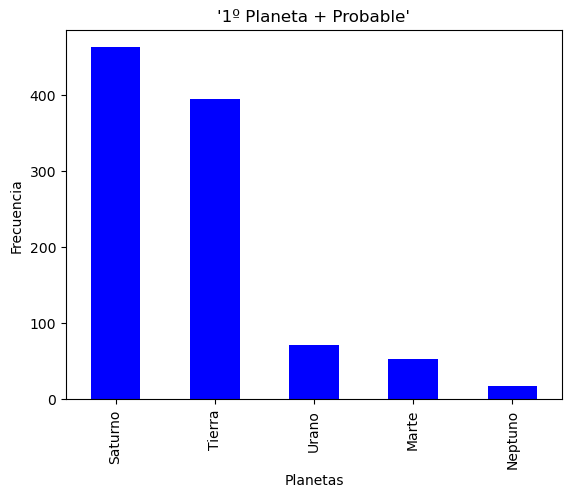

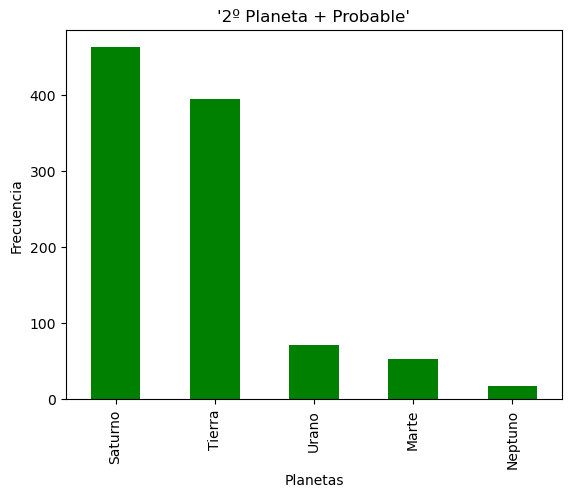

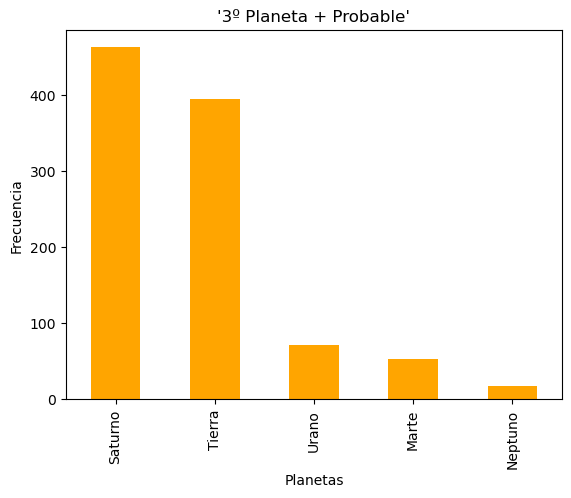

In [98]:

columnas_planetas = ['1º Planeta + Probable', '2º Planeta + Probable', '3º Planeta + Probable']
colores = ['blue', 'green', 'orange']

for columna, color in zip(columnas_planetas, colores):
    contar_planetas = df_experimentos[columna].value_counts()
    
    plt.figure()
    conteo_planetas.plot(kind='bar', color=color)
    plt.title(f"'{columna}'")
    plt.xlabel('Planetas')
    plt.ylabel('Frecuencia')
    plt.show()



Con ello podemos cocluir que lo más probable es que los astronautas estén en Saturno

𝙝𝙞𝙨𝙩𝙤𝙜𝙧𝙖𝙢𝙖 𝙥𝙖𝙧𝙖 𝙘𝙖𝙙𝙖 𝙫𝙖𝙧𝙞𝙖𝙗𝙡𝙚

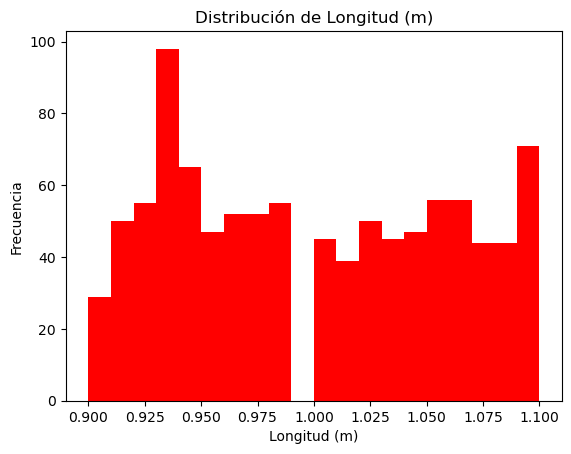

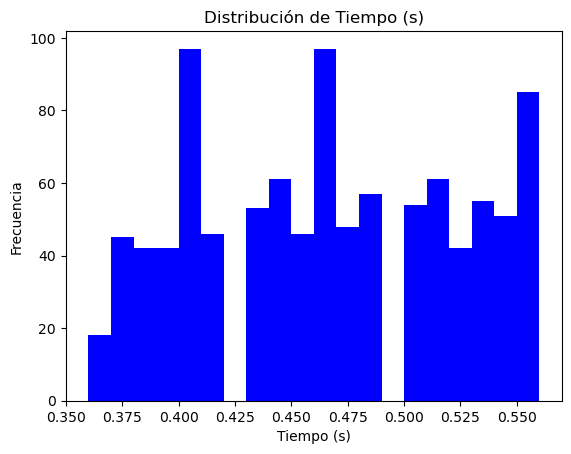

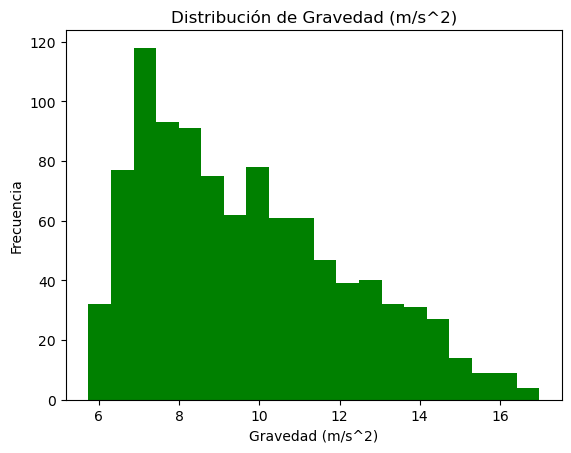

In [101]:
# Longitud 
plt.hist(df_experimentos['Longitud (m)'], bins=20, color='red')
plt.title('Distribución de Longitud (m)')
plt.xlabel('Longitud (m)')
plt.ylabel('Frecuencia')
plt.show()

#  Tiempo 
plt.hist(df_experimentos['Tiempo (s)'], bins=20, color='blue')
plt.title('Distribución de Tiempo (s)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia')
plt.show()

#  Gravedad 
plt.hist(df_experimentos['Gravedad (m/s^2)'], bins=20, color='green')
plt.title('Distribución de Gravedad (m/s^2)')
plt.xlabel('Gravedad (m/s^2)')
plt.ylabel('Frecuencia')
plt.show()




𝙢𝙖𝙩𝙧𝙞𝙯 𝙙𝙚 𝙘𝙤𝙣𝙛𝙪𝙨𝙞𝙤́𝙣 𝙥𝙖𝙧𝙖 𝙚𝙡 𝙥𝙡𝙖𝙣𝙚𝙩𝙖 + 𝙥𝙧𝙤𝙗𝙖𝙗𝙡𝙚

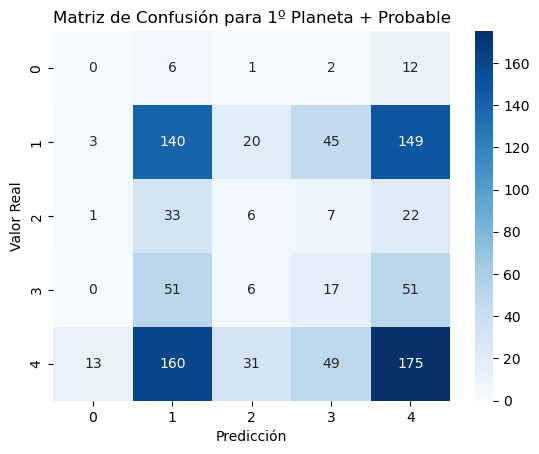

In [103]:
df_experimentos['1º Planeta + Probable'] = encoder.fit_transform(df_experimentos['1º Planeta + Probable'])

# Crear matriz de confusión para 1º Planeta + Probable
y_true = df_experimentos['1º Planeta + Probable']
y_pred = df_numerico['1º Planeta + Probable']

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para 1º Planeta + Probable')
plt.show()
